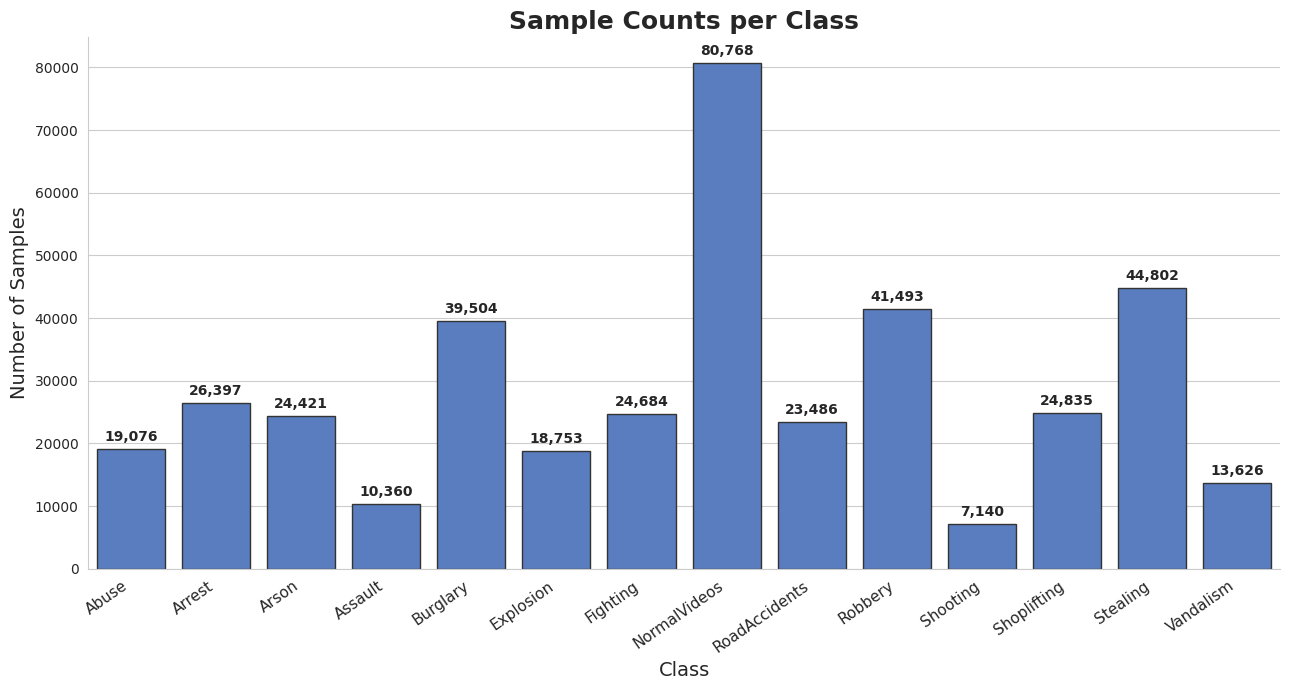

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set Seaborn style for beauty
sns.set_style("whitegrid")
sns.set_palette("muted")

# Data as DataFrame for easier plotting
labels = [
    "Abuse", "Arrest", "Arson", "Assault", "Burglary",
    "Explosion", "Fighting", "NormalVideos", "RoadAccidents",
    "Robbery", "Shooting", "Shoplifting", "Stealing", "Vandalism"
]
counts = [
    19076, 26397, 24421, 10360, 39504,
    18753, 24684, 80768, 23486,
    41493, 7140, 24835, 44802, 13626
]

df = pd.DataFrame({'Class': labels, 'Count': counts})

plt.figure(figsize=(13,7))
ax = sns.barplot(
    data=df, 
    x='Class', y='Count', 
    edgecolor='.2'
)

# Make the bars pop
for i, count in enumerate(df['Count']):
    ax.text(i, count + max(counts)*0.01, f"{count:,}", ha='center', va='bottom', fontsize=10, fontweight="semibold")

plt.xticks(rotation=35, ha='right', fontsize=11)
plt.title("Sample Counts per Class", fontsize=18, weight='bold')
plt.ylabel("Number of Samples", fontsize=14)
plt.xlabel("Class", fontsize=14)
plt.tight_layout()
sns.despine()
plt.savefig("src/class_counts.png", dpi=1200)
plt.show()

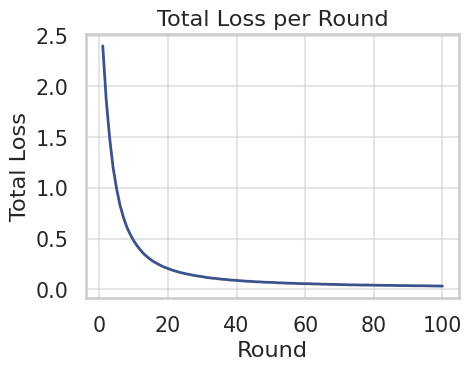

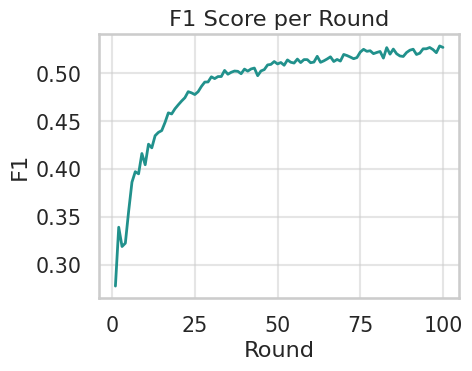

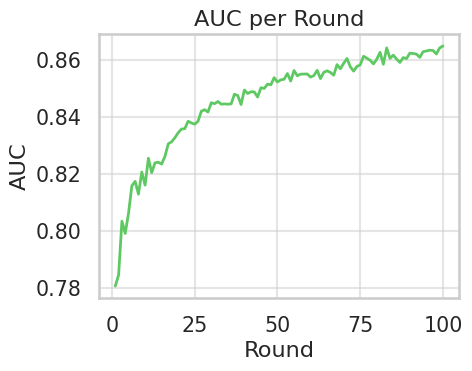

In [13]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

json_path = "/mnt/beegfs/home/mdzarifhossa2025/mdhossa/NSF/Research-Thrust-1-FedBalance-MetaLearning/results_fixmatch_fedavg_ucfcrime_withF1.json"

# --- Load + flatten JSON ---
with open(json_path, "r") as f:
    results = json.load(f)

records = []
for k, v in results["rounds"].items():
    r = int(k.split("_")[1])
    records.append({
        "round": r,
        "loss_total": v["loss_total"],
        "F1": v["F1"],
        "AUC": v["AUC"]
    })

df = pd.DataFrame(records).sort_values("round")

# --- Global style ---
sns.set_theme(style="whitegrid", context="talk", font_scale=0.9, rc={"axes.grid": True, "grid.alpha": 0.5},palette="pastel")
palette = sns.color_palette("viridis", 3)

# 1) Loss plot
plt.figure(figsize=(5, 4))
sns.lineplot(
    data=df, x="round", y="loss_total",
    color=palette[0],  linewidth=2
)
plt.title("Total Loss per Round")
plt.xlabel("Round")
plt.ylabel("Total Loss")
plt.tight_layout()
plt.savefig("src/plot_loss_per_round.png", dpi=1200)
plt.show()

# 2) F1 plot
plt.figure(figsize=(5, 4))
sns.lineplot(
    data=df, x="round", y="F1",
    color=palette[1],  linewidth=2
)
plt.title("F1 Score per Round")
plt.xlabel("Round")
plt.ylabel("F1")
plt.tight_layout()
plt.savefig("src/plot_f1_per_round.png", dpi=1200)
plt.show()

# 3) AUC plot
plt.figure(figsize=(5, 4))
sns.lineplot(
    data=df, x="round", y="AUC",
    color=palette[2],  linewidth=2
)
plt.title("AUC per Round")
plt.xlabel("Round")
plt.ylabel("AUC")
plt.tight_layout()
plt.savefig("src/plot_auc_per_round.png", dpi=1200)
plt.show()

LOSS columns: ['Step', 'Fcrimnet_20datasetBaseline - train/loss', 'Fcrimnet_20datasetBaseline - train/loss__MIN', 'Fcrimnet_20datasetBaseline - train/loss__MAX', 'Fcrimnet_FulldatasetBaseline - train/loss', 'Fcrimnet_FulldatasetBaseline - train/loss__MIN', 'Fcrimnet_FulldatasetBaseline - train/loss__MAX']
AUC  columns: ['Step', 'Fcrimnet_20datasetBaseline - test/micro_auc', 'Fcrimnet_20datasetBaseline - test/micro_auc__MIN', 'Fcrimnet_20datasetBaseline - test/micro_auc__MAX', 'Fcrimnet_FulldatasetBaseline - test/micro_auc', 'Fcrimnet_FulldatasetBaseline - test/micro_auc__MIN', 'Fcrimnet_FulldatasetBaseline - test/micro_auc__MAX']
F1   columns: ['Step', 'Fcrimnet_20datasetBaseline - test/micro_f1', 'Fcrimnet_20datasetBaseline - test/micro_f1__MIN', 'Fcrimnet_20datasetBaseline - test/micro_f1__MAX', 'Fcrimnet_FulldatasetBaseline - test/micro_f1', 'Fcrimnet_FulldatasetBaseline - test/micro_f1__MIN', 'Fcrimnet_FulldatasetBaseline - test/micro_f1__MAX']

Selected columns:
 loss   20% : Fcri

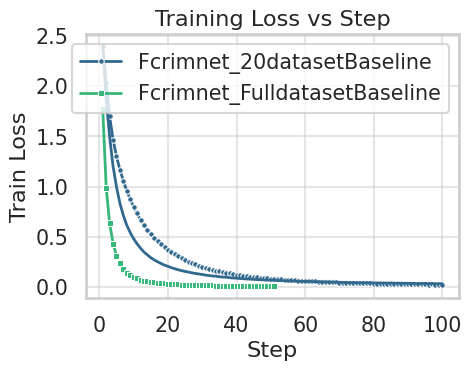

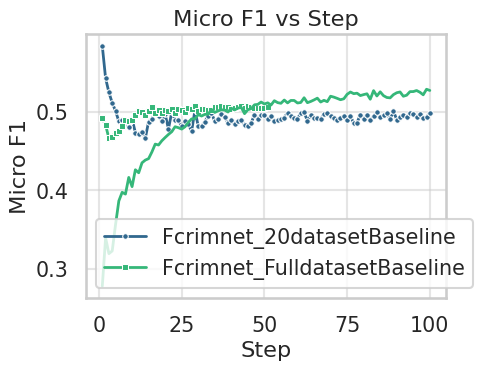

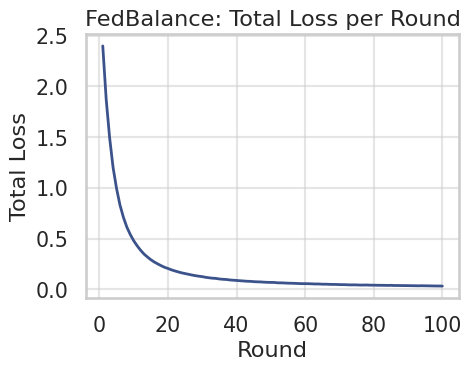

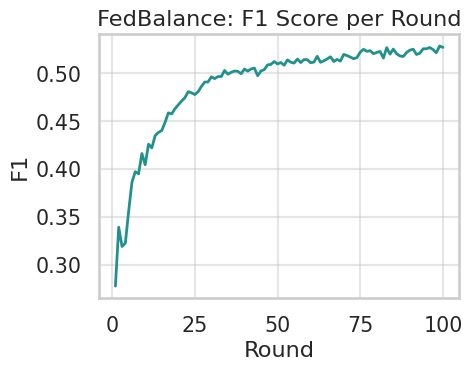

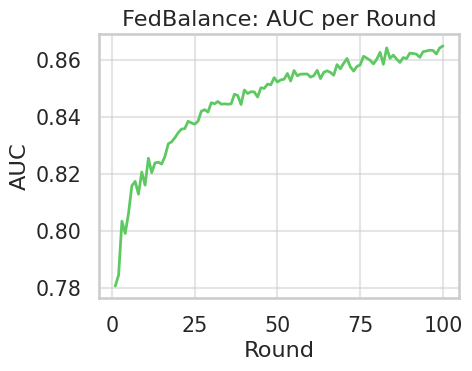

In [17]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Use the existing JSON that actually exists
json_path_fedbalance = "/mnt/beegfs/home/mdzarifhossa2025/mdhossa/NSF/Research-Thrust-1-FedBalance-MetaLearning/results_fixmatch_fedavg_ucfcrime_withF1.json"

# --- Load + flatten JSON for FedBalance ---
with open(json_path_fedbalance, "r") as f:
    results_fb = json.load(f)

records_fb = []
for k, v in results_fb["rounds"].items():
    r = int(k.split("_")[1])
    records_fb.append({
        "round": r,
        "loss_total": v["loss_total"],
        "F1": v["F1"],
        "AUC": v["AUC"]
    })

df_fb = pd.DataFrame(records_fb).sort_values("round")

# --- Global style (same as your existing cell) ---
sns.set_theme(
    style="whitegrid",
    context="talk",
    font_scale=0.9,
    rc={"axes.grid": True, "grid.alpha": 0.5}
)
palette = sns.color_palette("viridis", 3)

# 1) Loss plot (FedBalance)
plt.figure(figsize=(5, 4))
sns.lineplot(
    data=df_fb, x="round", y="loss_total",
    color=palette[0], linewidth=2
)
plt.title("FedBalance: Total Loss per Round")
plt.xlabel("Round")
plt.ylabel("Total Loss")
plt.tight_layout()
plt.savefig("src/plot_loss_per_round_fedbalance.png", dpi=1200)
plt.show()

# 2) F1 plot (FedBalance)
plt.figure(figsize=(5, 4))
sns.lineplot(
    data=df_fb, x="round", y="F1",
    color=palette[1], linewidth=2
)
plt.title("FedBalance: F1 Score per Round")
plt.xlabel("Round")
plt.ylabel("F1")
plt.tight_layout()
plt.savefig("src/plot_f1_per_round_fedbalance.png", dpi=1200)
plt.show()

# 3) AUC plot (FedBalance)
plt.figure(figsize=(5, 4))
sns.lineplot(
    data=df_fb, x="round", y="AUC",
    color=palette[2], linewidth=2
)
plt.title("FedBalance: AUC per Round")
plt.xlabel("Round")
plt.ylabel("AUC")
plt.tight_layout()
plt.savefig("src/plot_auc_per_round_fedbalance.png", dpi=1200)
plt.show()

LOSS columns: ['Step', 'Fcrimnet_20datasetBaseline - train/loss', 'Fcrimnet_20datasetBaseline - train/loss__MIN', 'Fcrimnet_20datasetBaseline - train/loss__MAX', 'Fcrimnet_FulldatasetBaseline - train/loss', 'Fcrimnet_FulldatasetBaseline - train/loss__MIN', 'Fcrimnet_FulldatasetBaseline - train/loss__MAX']
AUC  columns: ['Step', 'Fcrimnet_20datasetBaseline - test/micro_auc', 'Fcrimnet_20datasetBaseline - test/micro_auc__MIN', 'Fcrimnet_20datasetBaseline - test/micro_auc__MAX', 'Fcrimnet_FulldatasetBaseline - test/micro_auc', 'Fcrimnet_FulldatasetBaseline - test/micro_auc__MIN', 'Fcrimnet_FulldatasetBaseline - test/micro_auc__MAX']
F1   columns: ['Step', 'Fcrimnet_20datasetBaseline - test/micro_f1', 'Fcrimnet_20datasetBaseline - test/micro_f1__MIN', 'Fcrimnet_20datasetBaseline - test/micro_f1__MAX', 'Fcrimnet_FulldatasetBaseline - test/micro_f1', 'Fcrimnet_FulldatasetBaseline - test/micro_f1__MIN', 'Fcrimnet_FulldatasetBaseline - test/micro_f1__MAX']

Selected columns:
 loss   20% : Fcri

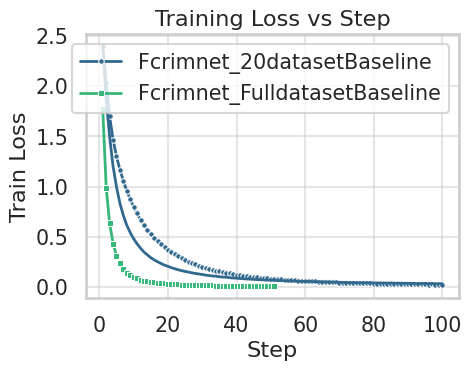

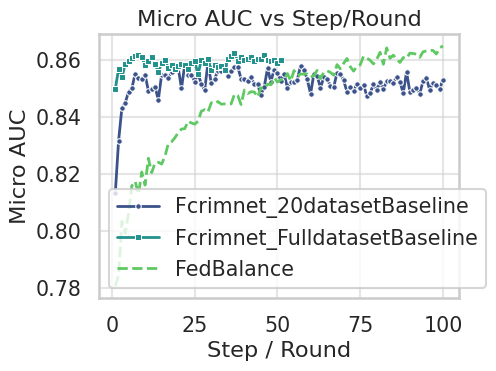

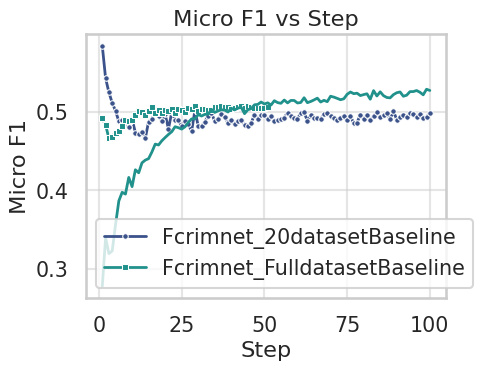

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

base_dir = "/mnt/beegfs/home/mdzarifhossa2025/mdhossa/NSF/Research-Thrust-1-FedBalance-MetaLearning"

# ---------- LOAD CSVs ----------
df_loss = pd.read_csv(f"{base_dir}/training_loss.csv")
df_auc  = pd.read_csv(f"{base_dir}/auc.csv")
df_f1   = pd.read_csv(f"{base_dir}/f1.csv")

print("LOSS columns:", df_loss.columns.tolist())
print("AUC  columns:", df_auc.columns.tolist())
print("F1   columns:", df_f1.columns.tolist())

# Robustly pick the 20%-dataset and full-dataset columns by substring
loss20_col = [c for c in df_loss.columns if "20datasetBaseline - train/loss" in c][0]
lossfull_col = [c for c in df_loss.columns if "FulldatasetBaseline - train/loss" in c][0]

auc20_col = [c for c in df_auc.columns if "20datasetBaseline - test/micro_auc" in c][0]
aucfull_col = [c for c in df_auc.columns if "FulldatasetBaseline - test/micro_auc" in c][0]

f120_col = [c for c in df_f1.columns if "20datasetBaseline - test/micro_f1" in c][0]
f1full_col = [c for c in df_f1.columns if "FulldatasetBaseline - test/micro_f1" in c][0]

print("\nSelected columns:")
print(" loss   20% :", loss20_col)
print(" loss   full:", lossfull_col)
print(" auc    20% :", auc20_col)
print(" auc    full:", aucfull_col)
print(" f1     20% :", f120_col)
print(" f1     full:", f1full_col)

# ---------- GLOBAL STYLE ----------
sns.set_theme(style="whitegrid", context="talk", font_scale=0.9)
palette = sns.color_palette("viridis", 2)

# ---------- 1) TRAINING LOSS ----------
plt.figure(figsize=(5, 4))
sns.lineplot(
    data=df_loss, x="Step", y=loss20_col,
    color=palette[0], marker="o", markersize=4, linewidth=2,
    label="Fcrimnet_20datasetBaseline"
)
sns.lineplot(
    data=df_loss, x="Step", y=lossfull_col,
    color=palette[1], marker="s", markersize=4, linewidth=2,
    label="Fcrimnet_FulldatasetBaseline"
)
sns.lineplot(
    data=df_fb, x="round", y="loss_total",
    color=palette[0], linewidth=2
)
plt.title("Training Loss vs Step")
plt.xlabel("Step")
plt.ylabel("Train Loss")
plt.legend(frameon=True)
plt.tight_layout()
plt.show()

# ---------- 2) MICRO AUC ----------
palette = sns.color_palette("viridis", 3)

plt.figure(figsize=(5, 4))

# 20% baseline
sns.lineplot(
    data=df_auc, x="Step", y=auc20_col,
    color=palette[0], marker="o", markersize=4, linewidth=2,
    label="Fcrimnet_20datasetBaseline"
)

# Full baseline
sns.lineplot(
    data=df_auc, x="Step", y=aucfull_col,
    color=palette[1], marker="s", markersize=4, linewidth=2,
    label="Fcrimnet_FulldatasetBaseline"
)

# FedBalance (AUC over rounds)
sns.lineplot(
    data=df_fb, x="round", y="AUC",
    color=palette[2], linewidth=2, linestyle="--",
    label="FedBalance"
)

plt.title("Micro AUC vs Step/Round")
plt.xlabel("Step / Round")
plt.ylabel("Micro AUC")
plt.legend(frameon=True)
plt.tight_layout()
plt.show()

# ---------- 3) MICRO F1 ----------
plt.figure(figsize=(5, 4))
sns.lineplot(
    data=df_f1, x="Step", y=f120_col,
    color=palette[0], marker="o", markersize=4, linewidth=2,
    label="Fcrimnet_20datasetBaseline"
)
sns.lineplot(
    data=df_f1, x="Step", y=f1full_col,
    color=palette[1], marker="s", markersize=4, linewidth=2,
    label="Fcrimnet_FulldatasetBaseline"
)
sns.lineplot(
    data=df_fb, x="round", y="F1",
    color=palette[1], linewidth=2
)
plt.title("Micro F1 vs Step")
plt.xlabel("Step")
plt.ylabel("Micro F1")
plt.legend(frameon=True)
plt.tight_layout()
plt.show()

LOSS columns: ['Step', 'Fcrimnet_20datasetBaseline - train/loss', 'Fcrimnet_20datasetBaseline - train/loss__MIN', 'Fcrimnet_20datasetBaseline - train/loss__MAX', 'Fcrimnet_FulldatasetBaseline - train/loss', 'Fcrimnet_FulldatasetBaseline - train/loss__MIN', 'Fcrimnet_FulldatasetBaseline - train/loss__MAX']
AUC  columns: ['Step', 'Fcrimnet_20datasetBaseline - test/micro_auc', 'Fcrimnet_20datasetBaseline - test/micro_auc__MIN', 'Fcrimnet_20datasetBaseline - test/micro_auc__MAX', 'Fcrimnet_FulldatasetBaseline - test/micro_auc', 'Fcrimnet_FulldatasetBaseline - test/micro_auc__MIN', 'Fcrimnet_FulldatasetBaseline - test/micro_auc__MAX']
F1   columns: ['Step', 'Fcrimnet_20datasetBaseline - test/micro_f1', 'Fcrimnet_20datasetBaseline - test/micro_f1__MIN', 'Fcrimnet_20datasetBaseline - test/micro_f1__MAX', 'Fcrimnet_FulldatasetBaseline - test/micro_f1', 'Fcrimnet_FulldatasetBaseline - test/micro_f1__MIN', 'Fcrimnet_FulldatasetBaseline - test/micro_f1__MAX']

Selected columns:
 loss   20% : Fcri

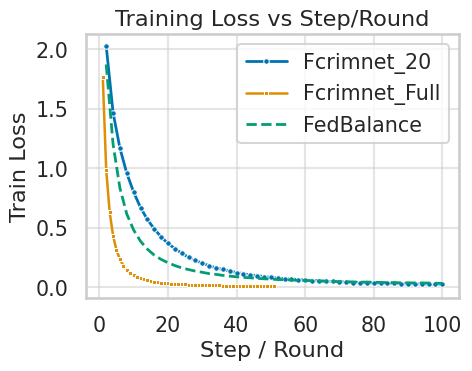

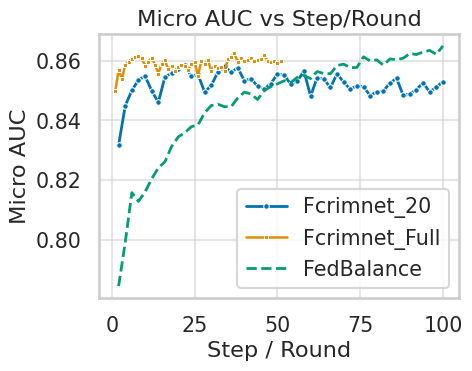

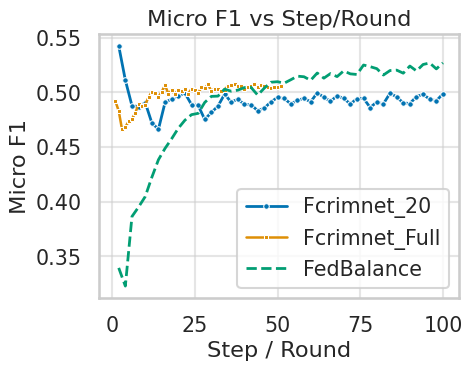

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

base_dir = "/mnt/beegfs/home/mdzarifhossa2025/mdhossa/NSF/Research-Thrust-1-FedBalance-MetaLearning"

json_path_fedbalance = "/mnt/beegfs/home/mdzarifhossa2025/mdhossa/NSF/Research-Thrust-1-FedBalance-MetaLearning/results_fixmatch_fedavg_ucfcrime_withF1.json"

# --- Load + flatten JSON for FedBalance ---
with open(json_path_fedbalance, "r") as f:
    results_fb = json.load(f)

records_fb = []
for k, v in results_fb["rounds"].items():
    r = int(k.split("_")[1])
    records_fb.append({
        "round": r,
        "loss_total": v["loss_total"],
        "F1": v["F1"],
        "AUC": v["AUC"]
    })

df_fb = pd.DataFrame(records_fb).sort_values("round")
# ---------- LOAD CSVs ----------
df_loss = pd.read_csv(f"{base_dir}/training_loss.csv")
df_auc  = pd.read_csv(f"{base_dir}/auc.csv")
df_f1   = pd.read_csv(f"{base_dir}/f1.csv")

print("LOSS columns:", df_loss.columns.tolist())
print("AUC  columns:", df_auc.columns.tolist())
print("F1   columns:", df_f1.columns.tolist())

# Robustly pick the 20%-dataset and full-dataset columns by substring
loss20_col = [c for c in df_loss.columns if "20datasetBaseline - train/loss" in c][0]
lossfull_col = [c for c in df_loss.columns if "FulldatasetBaseline - train/loss" in c][0]

auc20_col = [c for c in df_auc.columns if "20datasetBaseline - test/micro_auc" in c][0]
aucfull_col = [c for c in df_auc.columns if "FulldatasetBaseline - test/micro_auc" in c][0]

f120_col = [c for c in df_f1.columns if "20datasetBaseline - test/micro_f1" in c][0]
f1full_col = [c for c in df_f1.columns if "FulldatasetBaseline - test/micro_f1" in c][0]

print("\nSelected columns:")
print(" loss   20% :", loss20_col)
print(" loss   full:", lossfull_col)
print(" auc    20% :", auc20_col)
print(" auc    full:", aucfull_col)
print(" f1     20% :", f120_col)
print(" f1     full:", f1full_col)

# ---------- SUBSAMPLE: every 2 steps/rounds for 20% + FedBalance ----------
df_loss_20 = df_loss[df_loss["Step"] % 2 == 0].copy()   # ~50 points
df_auc_20  = df_auc[df_auc["Step"] % 2 == 0].copy()
df_f1_20   = df_f1[df_f1["Step"] % 2 == 0].copy()

df_fb_sub  = df_fb[df_fb["round"] % 2 == 0].copy()      # FedBalance ~50 points

# ---------- GLOBAL STYLE ----------
sns.set_theme(style="whitegrid", context="talk", font_scale=0.9)
palette = sns.color_palette("colorblind", 3)  # nicer, distinct colors

# ---------- 1) TRAINING LOSS ----------
plt.figure(figsize=(5, 4))

# 20% baseline (subsampled)
sns.lineplot(
    data=df_loss_20, x="Step", y=loss20_col,
    color=palette[0], marker="o", markersize=4, linewidth=2,
    label="Fcrimnet_20"
)

# Full baseline (all 100 points)
sns.lineplot(
    data=df_loss, x="Step", y=lossfull_col,
    color=palette[1], marker="s", markersize=3, linewidth=1.8,
    label="Fcrimnet_Full"
)

# FedBalance (subsampled)
sns.lineplot(
    data=df_fb_sub, x="round", y="loss_total",
    color=palette[2], linestyle="--", linewidth=2,
    label="FedBalance"
)

plt.title("Training Loss vs Step/Round")
plt.xlabel("Step / Round")
plt.ylabel("Train Loss")
plt.legend(frameon=True)
plt.tight_layout()
plt.show()

# ---------- 2) MICRO AUC ----------
plt.figure(figsize=(5, 4))

sns.lineplot(
    data=df_auc_20, x="Step", y=auc20_col,
    color=palette[0], marker="o", markersize=4, linewidth=2,
    label="Fcrimnet_20"
)

sns.lineplot(
    data=df_auc, x="Step", y=aucfull_col,
    color=palette[1], marker="s", markersize=3, linewidth=1.8,
    label="Fcrimnet_Full"
)

sns.lineplot(
    data=df_fb_sub, x="round", y="AUC",
    color=palette[2], linestyle="--", linewidth=2,
    label="FedBalance"
)

plt.title("Micro AUC vs Step/Round")
plt.xlabel("Step / Round")
plt.ylabel("Micro AUC")
plt.legend(frameon=True)
plt.tight_layout()
plt.show()

# ---------- 3) MICRO F1 ----------
plt.figure(figsize=(5, 4))

sns.lineplot(
    data=df_f1_20, x="Step", y=f120_col,
    color=palette[0], marker="o", markersize=4, linewidth=2,
    label="Fcrimnet_20"
)

sns.lineplot(
    data=df_f1, x="Step", y=f1full_col,
    color=palette[1], marker="s", markersize=3, linewidth=1.8,
    label="Fcrimnet_Full"
)

sns.lineplot(
    data=df_fb_sub, x="round", y="F1",
    color=palette[2], linestyle="--", linewidth=2,
    label="FedBalance"
)

plt.title("Micro F1 vs Step/Round")
plt.xlabel("Step / Round")
plt.ylabel("Micro F1")
plt.legend(frameon=True)
plt.tight_layout()
plt.show()

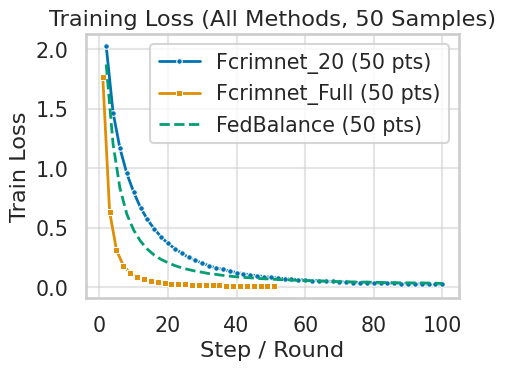

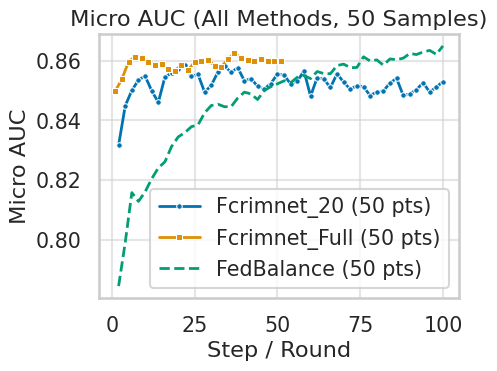

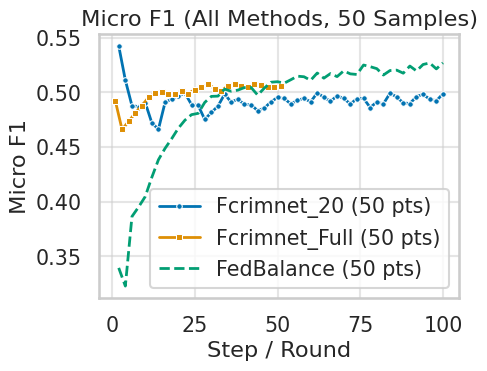

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

base_dir = "/mnt/beegfs/home/mdzarifhossa2025/mdhossa/NSF/Research-Thrust-1-FedBalance-MetaLearning"

# ---------- LOAD CSVs ----------
df_loss = pd.read_csv(f"{base_dir}/training_loss.csv")
df_auc  = pd.read_csv(f"{base_dir}/auc.csv")
df_f1   = pd.read_csv(f"{base_dir}/f1.csv")

# ---------- PICK COLUMNS (ROBUST) ----------
def pick_col(df, contains: str):
    cols = [c for c in df.columns if contains in c]
    if not cols:
        raise ValueError(f"Could not find any column containing: {contains}")
    return cols[0]

loss20_col   = pick_col(df_loss, "20datasetBaseline - train/loss")
lossfull_col = pick_col(df_loss, "FulldatasetBaseline - train/loss")

auc20_col    = pick_col(df_auc,  "20datasetBaseline - test/micro_auc")
aucfull_col  = pick_col(df_auc,  "FulldatasetBaseline - test/micro_auc")

f120_col     = pick_col(df_f1,   "20datasetBaseline - test/micro_f1")
f1full_col   = pick_col(df_f1,   "FulldatasetBaseline - test/micro_f1")

# ---------- FEDBALANCE: try to find inside same CSVs ----------
# If your FedBalance metrics are in separate file, comment these 3 lines and load your df_fb instead.
lossfb_col = pick_col(df_loss, "FedBalance")  # expects FedBalance loss column exists here
aucfb_col  = pick_col(df_auc,  "FedBalance")  # expects FedBalance auc column exists here
f1fb_col   = pick_col(df_f1,   "FedBalance")  # expects FedBalance f1 column exists here

# ---------- SUBSAMPLE ----------
# Fcrimnet_20: 100 -> keep every 2 steps -> ~50 points (x will still go to 100)
df_loss_20 = df_loss[df_loss["Step"] % 2 == 0].copy()
df_auc_20  = df_auc[df_auc["Step"] % 2 == 0].copy()
df_f1_20   = df_f1[df_f1["Step"] % 2 == 0].copy()

# FedBalance: (same idea) every 2 steps -> ~50 points
df_loss_fb = df_loss[df_loss["Step"] % 2 == 0].copy()
df_auc_fb  = df_auc[df_auc["Step"] % 2 == 0].copy()
df_f1_fb   = df_f1[df_f1["Step"] % 2 == 0].copy()

# Fcrimnet_Full: only 50 steps -> keep 50 but stretch x to 0..100
def downsample_50_keep(df):
    if len(df) <= 50:
        return df.copy()
    idx = np.linspace(0, len(df) - 1, 50).astype(int)
    return df.iloc[idx].copy()

df_loss_full_50 = downsample_50_keep(df_loss)
df_auc_full_50  = downsample_50_keep(df_auc)
df_f1_full_50   = downsample_50_keep(df_f1)

# Create a scaled x-axis for FULL so it visually spans 0..100
df_loss_full_50["Step_scaled"] = np.linspace(0, 100, len(df_loss_full_50))
df_auc_full_50["Step_scaled"]  = np.linspace(0, 100, len(df_auc_full_50))
df_f1_full_50["Step_scaled"]   = np.linspace(0, 100, len(df_f1_full_50))

# ---------- STYLE ----------
sns.set_theme(style="whitegrid", context="talk", font_scale=0.9)
palette = sns.color_palette("colorblind", 3)

def format_x_axis():
    plt.xlim(0, 100)
    plt.xticks(np.arange(0, 101, 20))
    plt.xlabel("Training Progress (0–100)")
    plt.legend(frameon=True)
    plt.tight_layout()

# ---------- 1) TRAINING LOSS ----------
plt.figure(figsize=(6, 4))

sns.lineplot(
    data=df_loss_20, x="Step", y=loss20_col,
    color=palette[0], marker="o", markersize=4, linewidth=2,
    label="Fcrimnet_20 (50 pts)"
)

sns.lineplot(
    data=df_loss_full_50, x="Step_scaled", y=lossfull_col,
    color=palette[1], marker="s", markersize=4, linewidth=2,
    label="Fcrimnet_Full (50 pts)"
)

sns.lineplot(
    data=df_loss_fb, x="Step", y=lossfb_col,
    color=palette[2], linestyle="--", linewidth=2,
    label="FedBalance (50 pts)"
)

plt.title("Training Loss (all methods, x-ticks 0–100)")
plt.ylabel("Train Loss")
format_x_axis()
plt.show()

# ---------- 2) MICRO AUC ----------
plt.figure(figsize=(6, 4))

sns.lineplot(
    data=df_auc_20, x="Step", y=auc20_col,
    color=palette[0], marker="o", markersize=4, linewidth=2,
    label="Fcrimnet_20 (50 pts)"
)

sns.lineplot(
    data=df_auc_full_50, x="Step_scaled", y=aucfull_col,
    color=palette[1], marker="s", markersize=4, linewidth=2,
    label="Fcrimnet_Full (50 pts)"
)

sns.lineplot(
    data=df_auc_fb, x="Step", y=aucfb_col,
    color=palette[2], linestyle="--", linewidth=2,
    label="FedBalance (50 pts)"
)

plt.title("Micro AUC (all methods, x-ticks 0–100)")
plt.ylabel("Micro AUC")
format_x_axis()
plt.show()

# ---------- 3) MICRO F1 ----------
plt.figure(figsize=(6, 4))

sns.lineplot(
    data=df_f1_20, x="Step", y=f120_col,
    color=palette[0], marker="o", markersize=4, linewidth=2,
    label="Fcrimnet_20 (50 pts)"
)

sns.lineplot(
    data=df_f1_full_50, x="Step_scaled", y=f1full_col,
    color=palette[1], marker="s", markersize=4, linewidth=2,
    label="Fcrimnet_Full (50 pts)"
)

sns.lineplot(
    data=df_f1_fb, x="Step", y=f1fb_col,
    color=palette[2], linestyle="--", linewidth=2,
    label="FedBalance (50 pts)"
)

plt.title("Micro F1 (all methods, x-ticks 0–100)")
plt.ylabel("Micro F1")
format_x_axis()
plt.show()


ValueError: Could not find any column containing: FedBalance

In [33]:
json_path_fedbalance = "/mnt/beegfs/home/mdzarifhossa2025/mdhossa/NSF/Research-Thrust-1-FedBalance-MetaLearning/results_fixmatch_fedavg_ucfcrime_withF1.json"

# --- Load + flatten JSON for FedBalance ---
with open(json_path_fedbalance, "r") as f:
    results_fb = json.load(f)

records_fb = []
for k, v in results_fb["rounds"].items():
    r = int(k.split("_")[1])
    records_fb.append({
        "round": r,
        "loss_total": v["loss_total"],
        "F1": v["F1"],
        "AUC": v["AUC"]
    })

df_fb = pd.DataFrame(records_fb).sort_values("round")

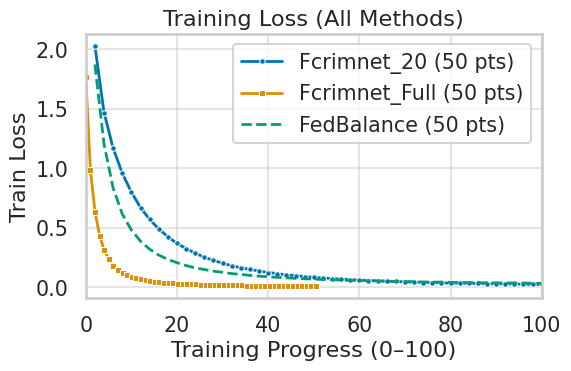

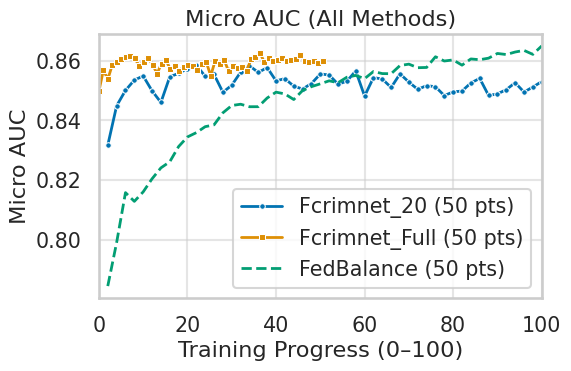

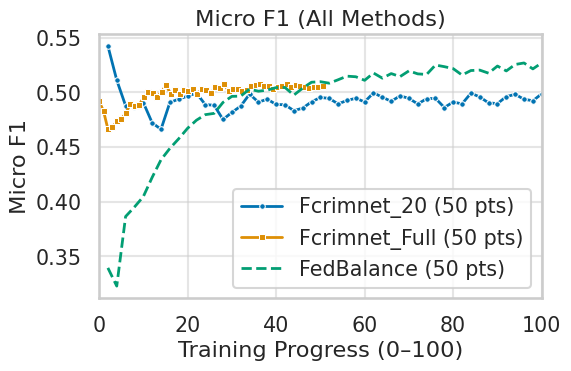

In [35]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

base_dir = "/mnt/beegfs/home/mdzarifhossa2025/mdhossa/NSF/Research-Thrust-1-FedBalance-MetaLearning"

# --------------------------------------------------
# 1) LOAD BASELINE CSV FILES
# --------------------------------------------------
df_loss = pd.read_csv(f"{base_dir}/training_loss.csv")
df_auc  = pd.read_csv(f"{base_dir}/auc.csv")
df_f1   = pd.read_csv(f"{base_dir}/f1.csv")

def pick_col(df, contains):
    cols = [c for c in df.columns if contains in c]
    if not cols:
        raise ValueError(f"Column containing '{contains}' not found.\nAvailable: {df.columns}")
    return cols[0]

loss20_col   = pick_col(df_loss, "20datasetBaseline - train/loss")
lossfull_col = pick_col(df_loss, "FulldatasetBaseline - train/loss")

auc20_col    = pick_col(df_auc, "20datasetBaseline - test/micro_auc")
aucfull_col  = pick_col(df_auc, "FulldatasetBaseline - test/micro_auc")

f120_col     = pick_col(df_f1, "20datasetBaseline - test/micro_f1")
f1full_col   = pick_col(df_f1, "FulldatasetBaseline - test/micro_f1")

# --------------------------------------------------
# 2) LOAD FEDBALANCE FROM JSON
# --------------------------------------------------
json_path_fedbalance = f"{base_dir}/results_fixmatch_fedavg_ucfcrime_withF1.json"

with open(json_path_fedbalance, "r") as f:
    results_fb = json.load(f)

records_fb = []
for k, v in results_fb["rounds"].items():
    r = int(k.split("_")[1])
    records_fb.append({
        "round": r,
        "loss_total": v["loss_total"],
        "F1": v["F1"],
        "AUC": v["AUC"]
    })

df_fb = pd.DataFrame(records_fb).sort_values("round")

# --------------------------------------------------
# 3) SUBSAMPLE TO 50 POINTS
# --------------------------------------------------

# Fcrimnet_20 → every 2 steps (100 → 50)
df_loss_20 = df_loss[df_loss["Step"] % 2 == 0].copy()
df_auc_20  = df_auc[df_auc["Step"] % 2 == 0].copy()
df_f1_20   = df_f1[df_f1["Step"] % 2 == 0].copy()

# FedBalance → every 2 rounds (100 → 50)
df_fb_sub = df_fb[df_fb["round"] % 2 == 0].copy()

# Fcrimnet_Full → only 50 steps → stretch to 0–100
def stretch_to_100(df):
    df = df.copy()
    df["Step_scaled"] = np.linspace(0, 100, len(df))
    return df

df_loss_full_50 = stretch_to_100(df_loss)
df_auc_full_50  = stretch_to_100(df_auc)
df_f1_full_50   = stretch_to_100(df_f1)

# --------------------------------------------------
# 4) PLOTTING STYLE
# --------------------------------------------------
sns.set_theme(style="whitegrid", context="talk", font_scale=0.9)
palette = sns.color_palette("colorblind", 3)

def finalize_axes(title, ylabel):
    plt.title(title)
    plt.xlabel("Training Progress (0–100)")
    plt.ylabel(ylabel)
    plt.xlim(0, 100)
    plt.xticks(np.arange(0, 101, 20))
    plt.legend(frameon=True)
    plt.tight_layout()

# --------------------------------------------------
# 5) TRAINING LOSS
# --------------------------------------------------
plt.figure(figsize=(6, 4))

sns.lineplot(
    data=df_loss_20, x="Step", y=loss20_col,
    color=palette[0], marker="o", markersize=4, linewidth=2,
    label="Fcrimnet_20 (50 pts)"
)

sns.lineplot(
    data=df_loss_full_50, x="Step_scaled", y=lossfull_col,
    color=palette[1], marker="s", markersize=4, linewidth=2,
    label="Fcrimnet_Full (50 pts)"
)

sns.lineplot(
    data=df_fb_sub, x="round", y="loss_total",
    color=palette[2], linestyle="--", linewidth=2,
    label="FedBalance (50 pts)"
)

finalize_axes("Training Loss (All Methods)", "Train Loss")
plt.show()

# --------------------------------------------------
# 6) MICRO AUC
# --------------------------------------------------
plt.figure(figsize=(6, 4))

sns.lineplot(
    data=df_auc_20, x="Step", y=auc20_col,
    color=palette[0], marker="o", markersize=4, linewidth=2,
    label="Fcrimnet_20 (50 pts)"
)

sns.lineplot(
    data=df_auc_full_50, x="Step_scaled", y=aucfull_col,
    color=palette[1], marker="s", markersize=4, linewidth=2,
    label="Fcrimnet_Full (50 pts)"
)

sns.lineplot(
    data=df_fb_sub, x="round", y="AUC",
    color=palette[2], linestyle="--", linewidth=2,
    label="FedBalance (50 pts)"
)

finalize_axes("Micro AUC (All Methods)", "Micro AUC")
plt.show()

# --------------------------------------------------
# 7) MICRO F1
# --------------------------------------------------
plt.figure(figsize=(6, 4))

sns.lineplot(
    data=df_f1_20, x="Step", y=f120_col,
    color=palette[0], marker="o", markersize=4, linewidth=2,
    label="Fcrimnet_20 (50 pts)"
)

sns.lineplot(
    data=df_f1_full_50, x="Step_scaled", y=f1full_col,
    color=palette[1], marker="s", markersize=4, linewidth=2,
    label="Fcrimnet_Full (50 pts)"
)

sns.lineplot(
    data=df_fb_sub, x="round", y="F1",
    color=palette[2], linestyle="--", linewidth=2,
    label="FedBalance (50 pts)"
)

finalize_axes("Micro F1 (All Methods)", "Micro F1")
plt.show()


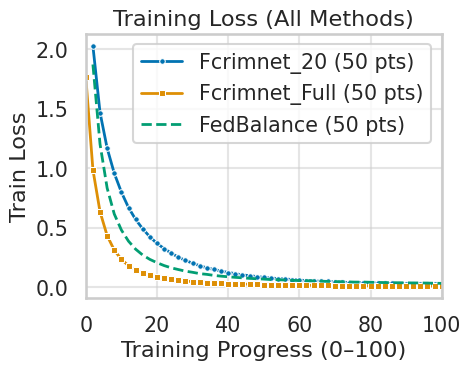

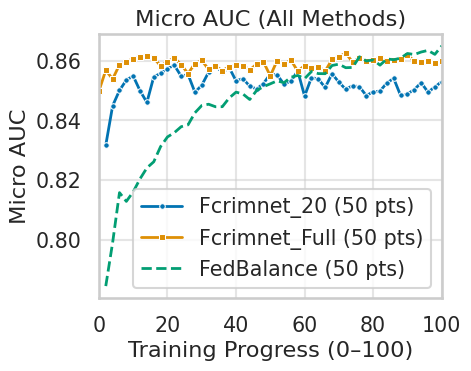

TypeError: finalize_axes() missing 1 required positional argument: 'ylabel'

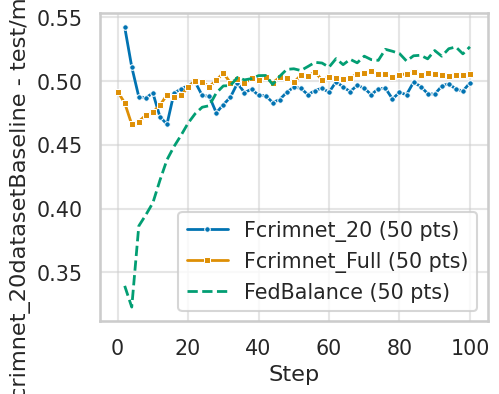

In [ ]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

base_dir = "/mnt/beegfs/home/mdzarifhossa2025/mdhossa/NSF/Research-Thrust-1-FedBalance-MetaLearning"

# -------------------------
# Load CSVs
# -------------------------
df_loss = pd.read_csv(f"{base_dir}/training_loss.csv")
df_auc  = pd.read_csv(f"{base_dir}/auc.csv")
df_f1   = pd.read_csv(f"{base_dir}/f1.csv")

def pick_col(df, contains):
    cols = [c for c in df.columns if contains in c]
    if not cols:
        raise ValueError(f"Column containing '{contains}' not found.\nAvailable columns:\n{list(df.columns)}")
    return cols[0]

loss20_col   = pick_col(df_loss, "20datasetBaseline - train/loss")
lossfull_col = pick_col(df_loss, "FulldatasetBaseline - train/loss")

auc20_col    = pick_col(df_auc,  "20datasetBaseline - test/micro_auc")
aucfull_col  = pick_col(df_auc,  "FulldatasetBaseline - test/micro_auc")

f120_col     = pick_col(df_f1,   "20datasetBaseline - test/micro_f1")
f1full_col   = pick_col(df_f1,   "FulldatasetBaseline - test/micro_f1")

# -------------------------
# Load FedBalance JSON -> df_fb
# -------------------------
json_path_fedbalance = f"{base_dir}/results_fixmatch_fedavg_ucfcrime_withF1.json"

with open(json_path_fedbalance, "r") as f:
    results_fb = json.load(f)

records_fb = []
for k, v in results_fb["rounds"].items():
    r = int(k.split("_")[1])
    records_fb.append({
        "round": r,
        "loss_total": v["loss_total"],
        "F1": v["F1"],
        "AUC": v["AUC"]
    })

df_fb = pd.DataFrame(records_fb).sort_values("round").reset_index(drop=True)

# -------------------------
# Helper: make 20% curve (100 -> 50 points) using interval=2
# -------------------------
def make_interval2_curve(df, x_col, y_col, keep_points=50):
    out = df[[x_col, y_col]].dropna().copy()
    out = out[out[x_col] % 2 == 0].copy()
    if len(out) > keep_points:
        out = out.iloc[:keep_points].copy()
    return out

# -------------------------
# Helper: make FULL curve (only valid rows), then stretch x to 0..100
# -------------------------
def make_full_stretched_curve(df, x_col, y_col, x_min=0, x_max=100):
    out = df[[x_col, y_col]].dropna().copy()  # <-- KEY FIX (removes NaNs after step 50)
    out = out.reset_index(drop=True)
    out["x_scaled"] = np.linspace(x_min, x_max, len(out))  # map 50 pts to 0..100
    return out

# -------------------------
# Build curves
# -------------------------
# Fcrimnet_20: every 2 steps => 50 pts, x remains 0..100
loss_20 = make_interval2_curve(df_loss, "Step", loss20_col)
auc_20  = make_interval2_curve(df_auc,  "Step", auc20_col)
f1_20   = make_interval2_curve(df_f1,   "Step", f120_col)

# FedBalance: every 2 rounds => 50 pts, x remains 0..100
loss_fb = make_interval2_curve(df_fb, "round", "loss_total")
auc_fb  = make_interval2_curve(df_fb, "round", "AUC")
f1_fb   = make_interval2_curve(df_fb, "round", "F1")

# Fcrimnet_Full: keep only non-NaN points (should be 50), stretch to 0..100
loss_full = make_full_stretched_curve(df_loss, "Step", lossfull_col)
auc_full  = make_full_stretched_curve(df_auc,  "Step", aucfull_col)
f1_full   = make_full_stretched_curve(df_f1,   "Step", f1full_col)

# -------------------------
# Plot settings
# -------------------------
sns.set_theme(style="whitegrid", context="talk", font_scale=0.9)
palette = sns.color_palette("colorblind", 3)

def finalize_axes(title, ylabel):
    plt.title(title)
    plt.xlabel("Training Progress (0–100)")
    plt.ylabel(ylabel)
    plt.xlim(0, 100)
    plt.xticks(np.arange(0, 101, 20))
    plt.legend(frameon=True)
    plt.tight_layout()

# -------------------------
# 1) Training Loss
# -------------------------
plt.figure(figsize=(5, 4))
sns.lineplot(data=loss_20,   x="Step",     y=loss20_col,   color=palette[0], marker="o", markersize=4, linewidth=2, label="Fcrimnet_20 (50 pts)")
sns.lineplot(data=loss_full, x="x_scaled", y=lossfull_col, color=palette[1], marker="s", markersize=4, linewidth=2, label="Fcrimnet_Full (50 pts)")
sns.lineplot(data=loss_fb,   x="round",    y="loss_total", color=palette[2], linestyle="--", linewidth=2, label="FedBalance (50 pts)")
finalize_axes("Training Loss (All Methods)", "Train Loss")
plt.show()

# -------------------------
# 2) Micro AUC
# -------------------------
plt.figure(figsize=(5, 4))
sns.lineplot(data=auc_20,    x="Step",     y=auc20_col,   color=palette[0], marker="o", markersize=4, linewidth=2, label="Fcrimnet_20 (50 pts)")
sns.lineplot(data=auc_full,  x="x_scaled", y=aucfull_col, color=palette[1], marker="s", markersize=4, linewidth=2, label="Fcrimnet_Full (50 pts)")
sns.lineplot(data=auc_fb,    x="round",    y="AUC",       color=palette[2], linestyle="--", linewidth=2, label="FedBalance (50 pts)")
finalize_axes("Micro AUC (All Methods)", "Micro AUC")
plt.show()

# -------------------------
# 3) Micro F1
# -------------------------
plt.figure(figsize=(5, 4))
sns.lineplot(data=f1_20,     x="Step",     y=f120_col,   color=palette[0], marker="o", markersize=4, linewidth=2, label="Fcrimnet_20 (50 pts)")
sns.lineplot(data=f1_full,   x="x_scaled", y=f1full_col, color=palette[1], marker="s", markersize=4, linewidth=2, label="Fcrimnet_Full (50 pts)")
sns.lineplot(data=f1_fb,     x="round",    y="F1",       color=palette[2], linestyle="--", linewidth=2, label="FedBalance (50 pts)")
finalize_axes("Micro F1 (All Methods)", "Micro F1")
plt.show()
